# **<center><font style="color:rgb(100,109,254)">Module 1: Creating a Live Gesture Control Application</font> </center>**

<img src='https://drive.google.com/uc?export=download&id=10xY6U-4CecBuMkbONZp6bPx7BAZB6xfX'>

## **<font style="color:rgb(134,19,348)"> Module Outline </font>**

The module can be split into the following parts:

- *Lesson 1: Introduction to hand landmark detection theory*

- *Lesson 2:* Create a Hands Landmarks Detector

- *Lesson 3:* Build a Hands Fingers Counter

- ***Lesson 4:* Build a Hand Gesture Recognizer** *(This Tutorial)*

- *Lesson 5:* Distance measurement

- *Lesson 6:* Brightness, Saturation, Contrast Enhancement & Gamma Correction

- *Lesson 7:* Build the Final Application

**Please Note**, these Jupyter Notebooks are not for sharing; do read the Copyright message below the Code License Agreement section which is in the last cell of this notebook.
-Taha Anwar

Alright, let's get started.

### **<font style="color:rgb(134,19,348)"> Import the Libraries</font>**

First we will import the required libraries.

In [2]:
import cv2
import mediapipe as mp
import matplotlib.pyplot as plt
from previous_lesson import detectHandsLandmarks, countFingers


# Import the previous lessons

## **<font style="color:rgb(134,19,348)">Initialize the Hands Landmarks Detection Model</font>**

After that, we will need to initialize the **`mp.solutions.hands`** class and then set up the **`mp.solutions.hands.Hands()`** function with appropriate arguments and also initialize **`mp.solutions.drawing_utils`** class that is required to visualize the detected landmarks, as we have been doing in the previous lessons.

In [5]:
# Initialize the mediapipe hands class.
mp_hands = mp.solutions.hands

# Set up the Hands functions for images and videos.
hands = mp_hands.Hands(static_image_mode=True, max_num_hands=2, min_detection_confidence=0.3)
hands_videos = mp_hands.Hands(static_image_mode=False, max_num_hands=2, min_detection_confidence=0.8)

# Initialize the mediapipe drawing class.
mp_drawing = mp.solutions.drawing_utils

## **<font style="color:rgb(134,19,348)">Create a Hand Gesture Recognizer Function</font>**

Now we will create a function **`recognizeGestures()`**, that will use the status (i.e., up or down) of the fingers outputted by the function **`countFingers()`** to determine the gesture of the hands in the image. The function will be capable of identifying the following hand gestures:

* **INDEX POINTING UP Hand Gesture** ☝️   (i.e., only the index finger up)
*  **VICTORY Hand Gesture** ✌️ (i.e., only the index and middle fingers up)
*  **SPIDERMAN Hand Gesture** 🤟 (i.e., only the thumb, index, and pinky fingers up)
*  **HIGH-FIVE Hand Gesture** ✋ (i.e., all the five fingers up)

**Note:** *This function can easily be extended to identify more gestures as long as the fingers up in the gestures list don't overlap like the victory hand gesture* (✌)*, and crossed fingers gesture* (🤞) *have the same fingers up.*

In [6]:
def recognizeGestures(image, results, hand_label='LEFT', draw=True, display=True):
    '''
    This function will determine the gesture a hand in the image.
    Args:
        image:      The image of the hands on which the hand gesture recognition is required to be performed.
        results:    The output of the hands landmarks detection performed on the image.
        hand_label: The label of the hand i.e. left or right, of which the gesture is to be recognized.      
        draw:       A boolean value that is if set to true the function writes the gesture of the hand on the
                    image, after recognition.
        display:    A boolean value that is if set to true the function displays the resultant image and 
                    returns nothing.
    Returns:
        hands_gestures:        The recognized gesture of the specified hand in the image.
        fingers_tips_position: The fingers tips landmarks coordinates of the other hand in the image.
    '''
    
    # Initialize a variable to store the gesture of the hand in the image.
    hand_gesture = 'UNKNOWN'
    
    # Initialize a variable to store the color we will use to write the hand gesture on the image.
    # Initially it is red which represents that the gesture is not recognized.
    color = (0, 0, 255)
    
    # Get the count of fingers up, fingers statuses, and tips landmarks of the detected hand(s).
    count, fingers_statuses, fingers_tips_position = countFingers(image, results, draw=False,
                                                                  display=False)
    
    # Check if the number of the fingers up of the hand is 1 and the finger that is up,
    # is the index finger.
    if count[hand_label] == 1 and fingers_statuses[hand_label+'_INDEX']:
        
        # Set the gesture recognized of the hand to INDEX POINTING UP SIGN.
        hand_gesture = 'INDEX POINTING UP'
        
        # Update the color value to green.
        color=(0,255,0)

    # Check if the number of fingers up of the hand is 2 and the fingers that are up,
    # are the index and the middle finger.
    elif count[hand_label] == 2  and fingers_statuses[hand_label+'_INDEX'] and \
    fingers_statuses[hand_label+'_MIDDLE']:
        
        # Set the gesture recognized of the hand to VICTORY SIGN.
        hand_gesture =  'VICTORY'
        
        # Update the color value to green.
        color=(0,255,0)
    
    # Check if the number of fingers up of the hand is 3 and the fingers that are up,
    # are the index, pinky, and the thumb.
    elif count[hand_label] == 3  and fingers_statuses[hand_label+'_INDEX'] and \
    fingers_statuses[hand_label+'_PINKY'] and fingers_statuses[hand_label+'_THUMB']:
        
        # Set the gesture recognized of the hand to SPIDERMAN SIGN.
        hand_gesture =  'SPIDERMAN'
        
        # Update the color value to green.
        color=(0,255,0)
    
    # Check if the number of fingers up of the hand is 5.
    elif count[hand_label] == 5:
        
        # Set the gesture recognized of the hand to HIGH-FIVE SIGN.
        hand_gesture =  'HIGH-FIVE'
        
        # Update the color value to green.
        color=(0,255,0)
        
    # Check if the recognized hand gesture is specified to be written.
    if draw:

        # Write the recognized hand gesture on the image. 
        cv2.putText(image, hand_label +' HAND: '+ hand_gesture , (10, 60),
                    cv2.FONT_HERSHEY_PLAIN, 4, color, 5)
    
    # Check if the image is specified to be displayed.
    if display:

        # Display the resultant image.
        plt.figure(figsize=[10,10])
        plt.imshow(image[:,:,::-1]);plt.title("Output Image");plt.axis('off');
    
    # Otherwise
    else:
    
        # Return the hand gesture name and the fingers tips position of the other hand.
        return hand_gesture, fingers_tips_position['LEFT' if hand_label=='RIGHT' else 'RIGHT']

Now let's test our Hand Gesture Recognizer function **`recognizeGestures()`** created above, on a few sample images and display the results.

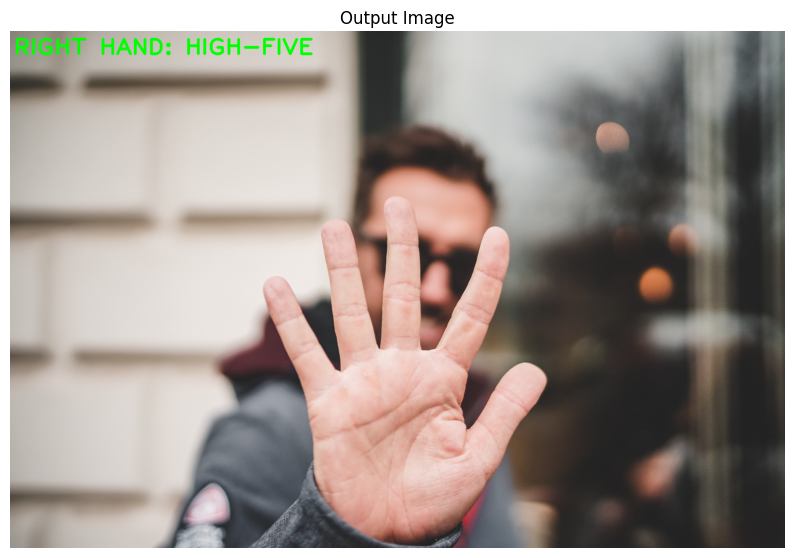

In [7]:
# Read a sample image and perform the hand gesture recognition on it after flipping it horizontally.
image = cv2.imread('media/sample11.jpg')
flipped_image = cv2.flip(image, 1)
_, results = detectHandsLandmarks(flipped_image, hands, display=False)
if results.multi_hand_landmarks:
    recognizeGestures(image, results, hand_label='RIGHT')

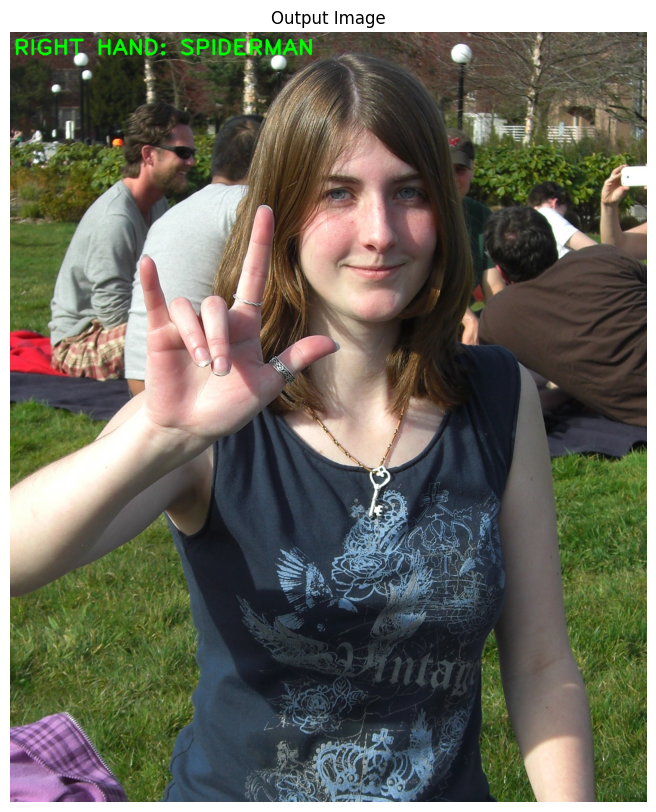

In [8]:
# Read another sample image and perform the hand gesture recognition on it after flipping it horizontally.
image = cv2.imread('media/sample15.jpg')
flipped_image = cv2.flip(image, 1)
_, results = detectHandsLandmarks(flipped_image, hands, display=False)
if results.multi_hand_landmarks:
    recognizeGestures(image, results, hand_label='RIGHT')

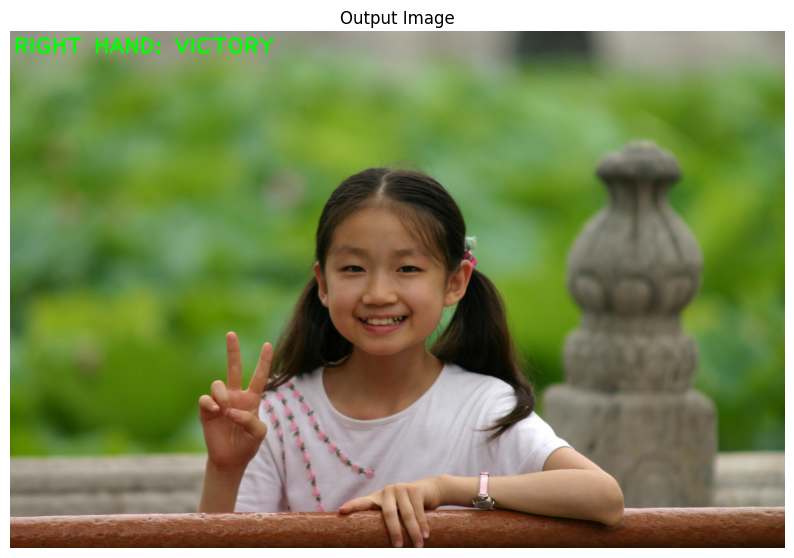

In [9]:
# Read another sample image and perform the hand gesture recognition on it after flipping it horizontally.
image = cv2.imread('media/sample16.jpg')
flipped_image = cv2.flip(image, 1)
_, results = detectHandsLandmarks(flipped_image, hands, display=False)
if results.multi_hand_landmarks:
    recognizeGestures(image, results, hand_label='RIGHT')

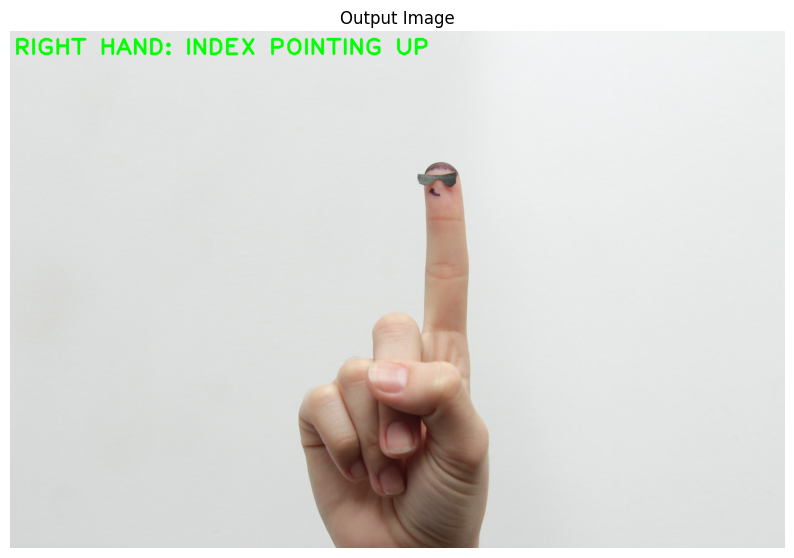

In [10]:
# Read another sample image and perform the hand gesture recognition on it after flipping it horizontally.
image = cv2.imread('media/sample17.jpg')
flipped_image = cv2.flip(image, 1)
_, results = detectHandsLandmarks(flipped_image, hands, display=False)
if results.multi_hand_landmarks:
    recognizeGestures(image, results, hand_label='RIGHT')

Wow! working accurately on images for each gesture. Now let's check it on a real-time webcam feed.

In [11]:
# Initialize the VideoCapture object to read from the webcam.
camera_video = cv2.VideoCapture(0)
camera_video.set(3,1280)
camera_video.set(4,960)

# Create named window for resizing purposes.
cv2.namedWindow('Hand Gesture Recognizer', cv2.WINDOW_NORMAL)

# Iterate until the webcam is accessed successfully.
while camera_video.isOpened():
    
    # Read a frame.
    ok, frame = camera_video.read()
    
    # Check if frame is not read properly then continue to the next iteration to read the next frame.
    if not ok:
        continue
    
    # Flip the frame horizontally for natural (selfie-view) visualization.
    frame = cv2.flip(frame, 1)
    
    # Perform Hands landmarks detection on the frame.
    frame, results = detectHandsLandmarks(frame, hands_videos, display=False)
    
    # Check if the hands landmarks in the frame are detected.
    if results.multi_hand_landmarks:
        
        # Perform left hand gesture recognition and visualize the results on the frame.
        recognizeGestures(frame, results, hand_label='LEFT', draw=True, display=False)
                
    # Display the frame.
    cv2.imshow('Hand Gesture Recognizer', frame)
    
    # Wait for 1ms. If a key is pressed, retreive the ASCII code of the key.
    k = cv2.waitKey(1) & 0xFF
    
    # Check if 'ESC' is pressed and break the loop.
    if(k == 27):
        break

# Release the VideoCapture Object and close the windows.
camera_video.release()
cv2.destroyAllWindows()


# Additional comments:
#       - The program works by setting flags that determine
#         whether the left hand's finger is pointed up.
#         depending on the combination of flags that are true,
#         a gesture or a non-gesture can be determined.

Perfect! its working as expected on videos too.

### **<font style="color:rgb(255,140,0)"> Code License Agreement </font>**
```
Copyright (c) 2022 Bleedai.com

Feel free to use this code for your own projects commercial or noncommercial, these projects can be Research-based, just for fun, for-profit, or even Education with the exception that you’re not going to use it for developing a course, book, guide, or any other educational products.

Under *NO CONDITION OR CIRCUMSTANCE* you may use this code for your own paid educational or self-promotional ventures without written consent from Taha Anwar (BleedAI.com).

```
